In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv('smoke_detection_iot.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0', 'UTC'])

In [4]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [6]:
for i in df.columns:
    
    df[i] = df[i].fillna(df[i].mean())

In [7]:
df.head(2)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,FireAlarm
0,16941,3283,0,0,543,461,2093,0,0,0,0,0,0,0
1,16954,3214,0,0,565,509,2102,0,0,0,0,0,1,0


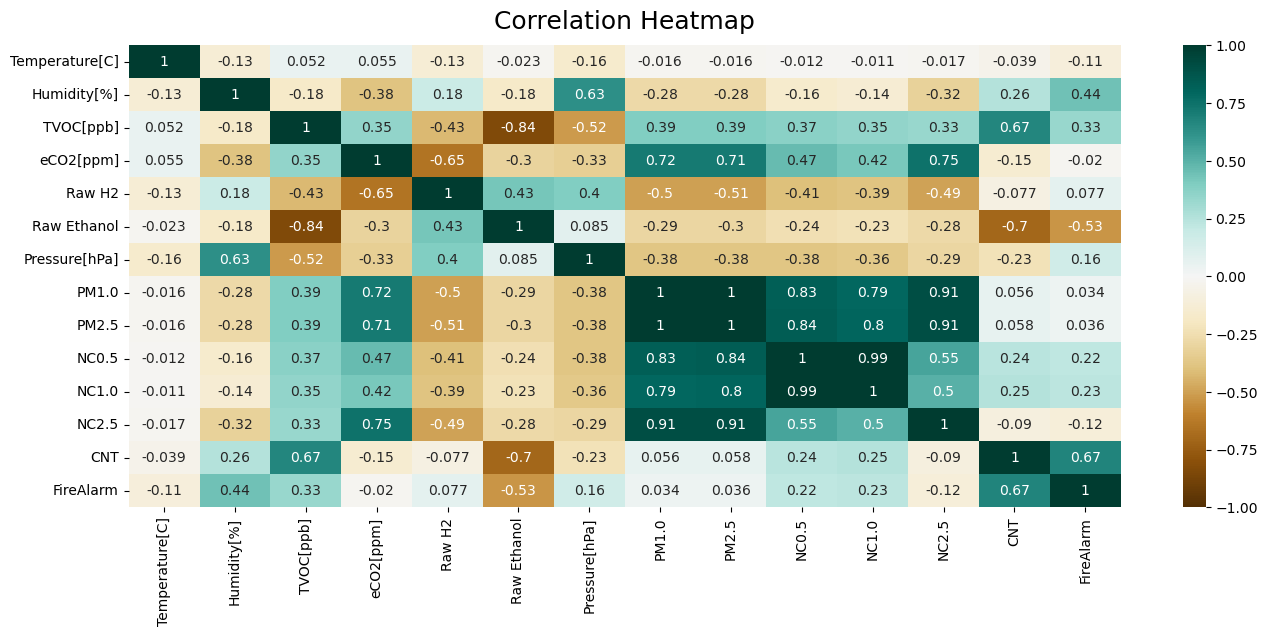

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# Save the plot in PNG format
plt.savefig('correlation_heatmap.png', format='png')

# Save the plot in PDF format
plt.savefig('correlation_heatmap.pdf', format='pdf')

# Display the plot
plt.show()

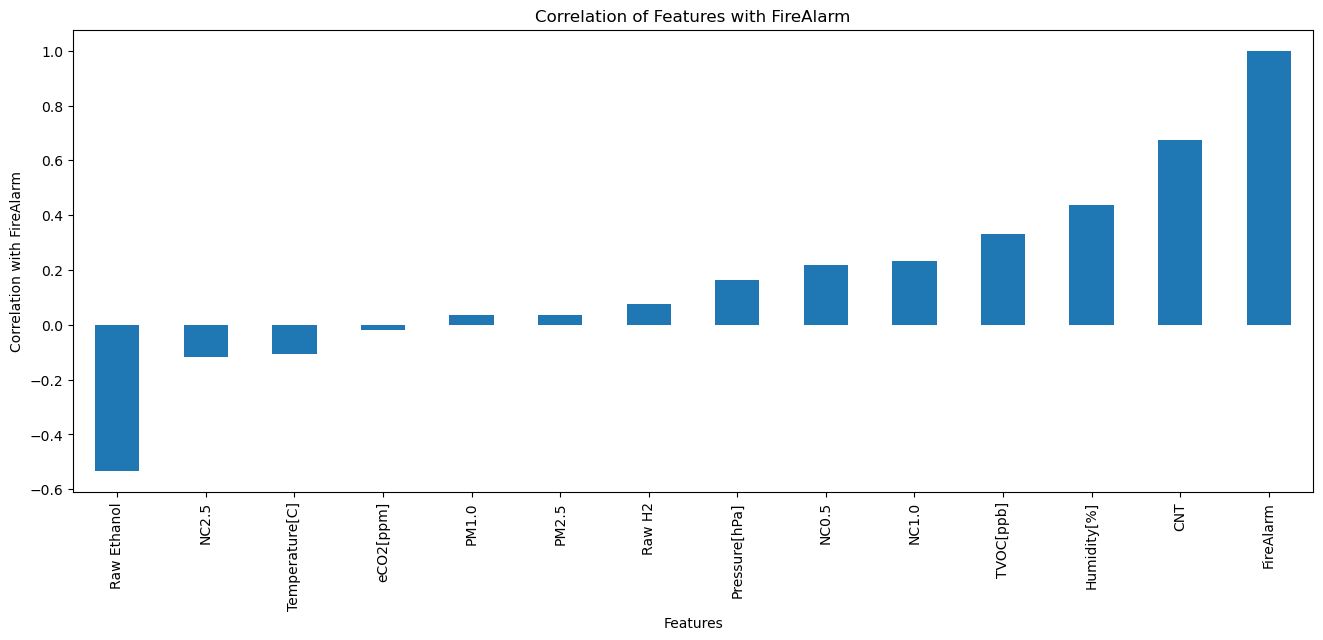

In [9]:
df.corrwith(df['FireAlarm']).sort_values(ascending=True).plot(kind='bar', figsize=(16, 6))

plt.xlabel('Features')
plt.ylabel('Correlation with FireAlarm')
plt.title('Correlation of Features with FireAlarm')

# Save the plot in PNG format
plt.savefig('correlation_with_FireAlarm.png', format='png')

# Save the plot in PDF format
plt.savefig('correlation_with_FireAlarm.pdf', format='pdf')

# Display the plot
plt.show()

In [10]:
X = df[df.columns[:-1]]
y = df['FireAlarm']

[[1810    0]
 [   0 4453]]


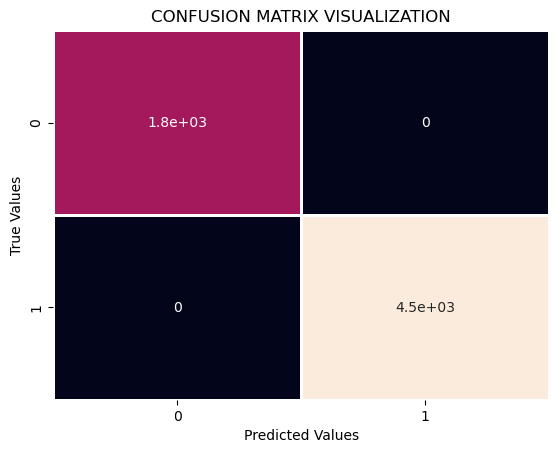

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")

# Save the plot in PNG format
plt.savefig('confusion_matrix.png', format='png')

# Save the plot in PDF format
plt.savefig('confusion_matrix.pdf', format='pdf')

# Display the plot
plt.show()

In [12]:
acc = accuracy_score(y_test,y_pred)
print(acc)


1.0


In [13]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1810
           1       1.00      1.00      1.00      4453

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



In [14]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

1.0

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

1.0

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

1.0

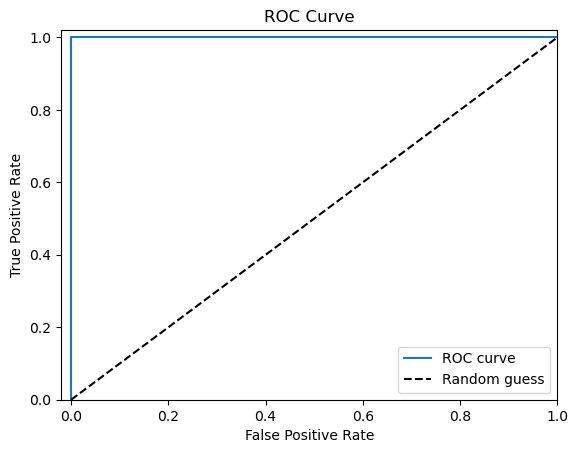

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Save the plot in PNG format
plt.savefig('roc_curve.png', format='png')

# Save the plot in PDF format
plt.savefig('roc_curve.pdf', format='pdf')

# Display the plot
plt.show()

In [ ]:
#bbining

In [36]:
df.Age


0      28
1      51
2      34
3      47
4      47
       ..
886    35
887    24
888    88
889    34
890    42
Name: Age, Length: 891, dtype: int64

In [37]:
df.Age.max()

88

In [39]:
df.Age.min()

0

In [44]:

bin_edges = [0, 30, 50, float('inf')] 
bin_labels = ['Young', 'Middle-aged', 'Senior']

df['AgeNew']= pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)


In [49]:
lx = []
for i in df.Age:
    if i < 30:
        lx.append('A')
    elif i > 30 and i < 50:
        lx.append('B')
    else:
        lx.append('C')

In [50]:
from collections import Counter

Counter(lx)

Counter({'A': 246, 'C': 372, 'B': 273})